In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bird-speciestiny/bird-species-tiny.csv
/kaggle/input/bird-speciestiny/valid/BANDED BROADBILL/5.jpg
/kaggle/input/bird-speciestiny/valid/BANDED BROADBILL/1.jpg
/kaggle/input/bird-speciestiny/valid/BANDED BROADBILL/4.jpg
/kaggle/input/bird-speciestiny/valid/BANDED BROADBILL/3.jpg
/kaggle/input/bird-speciestiny/valid/BANDED BROADBILL/2.jpg
/kaggle/input/bird-speciestiny/valid/BIRD OF PARADISE/5.jpg
/kaggle/input/bird-speciestiny/valid/BIRD OF PARADISE/1.jpg
/kaggle/input/bird-speciestiny/valid/BIRD OF PARADISE/4.jpg
/kaggle/input/bird-speciestiny/valid/BIRD OF PARADISE/3.jpg
/kaggle/input/bird-speciestiny/valid/BIRD OF PARADISE/2.jpg
/kaggle/input/bird-speciestiny/test/BANDED BROADBILL/5.jpg
/kaggle/input/bird-speciestiny/test/BANDED BROADBILL/1.jpg
/kaggle/input/bird-speciestiny/test/BANDED BROADBILL/4.jpg
/kaggle/input/bird-speciestiny/test/BANDED BROADBILL/3.jpg
/kaggle/input/bird-speciestiny/test/BANDED BROADBILL/2.jpg
/kaggle/input/bird-speciestiny/test/BIRD OF PARADISE

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from umap import UMAP
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

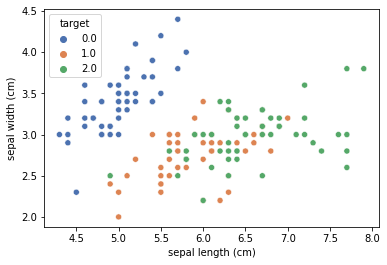

In [5]:
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue="target", palette="deep")

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

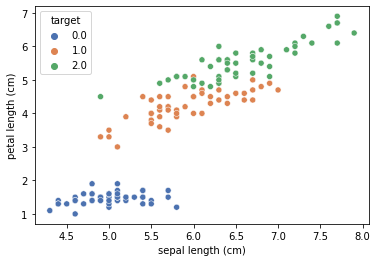

In [6]:
sns.scatterplot(data=df, x="sepal length (cm)", y="petal length (cm)", hue="target", palette="deep")

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

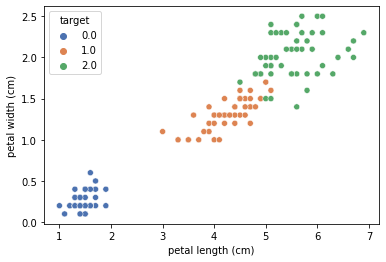

In [7]:
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="target", palette="deep")

In [8]:
X = df.drop(['target'], axis=1)
y = df['target']

In [9]:
X = StandardScaler().fit_transform(X)

In [10]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
normalised_x = pd.DataFrame(X,columns=feat_cols)

In [11]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

In [12]:
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
pca_df.head()

,principal component 1,principal component 2,principal component 3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


In [13]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.72962445 0.22850762 0.03668922]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


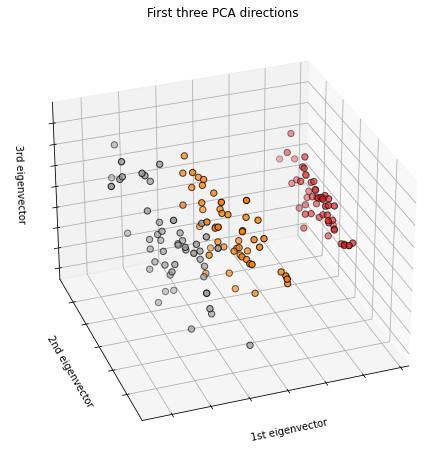

In [14]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(
    principalComponents[:, 0],
    principalComponents[:, 1],
    principalComponents[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## PCA on image dataset

In [15]:
folder_path = '/kaggle/input/bird-speciestiny/train/'
df_image = pd.read_csv('/kaggle/input/bird-speciestiny/bird-species-tiny.csv')
df_image.head()

,Unnamed: 0,Unnamed: 0.1,filepaths,labels,data set
0,3006,3006,train/BANDED BROADBILL/001.jpg,BANDED BROADBILL,train
1,3007,3007,train/BANDED BROADBILL/002.jpg,BANDED BROADBILL,train
2,3008,3008,train/BANDED BROADBILL/003.jpg,BANDED BROADBILL,train
3,3009,3009,train/BANDED BROADBILL/004.jpg,BANDED BROADBILL,train
4,3010,3010,train/BANDED BROADBILL/005.jpg,BANDED BROADBILL,train


In [16]:
img_height = 180
img_width = 180

In [17]:
img_ds = tf.keras.utils.image_dataset_from_directory(
  folder_path,
  seed=123,
  image_size=(img_height, img_width)
)

Found 322 files belonging to 2 classes.


2022-05-10 17:51:21.056190: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
class_names = img_ds.class_names
print(class_names)

['BANDED BROADBILL', 'BIRD OF PARADISE']


2022-05-10 17:51:21.413264: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


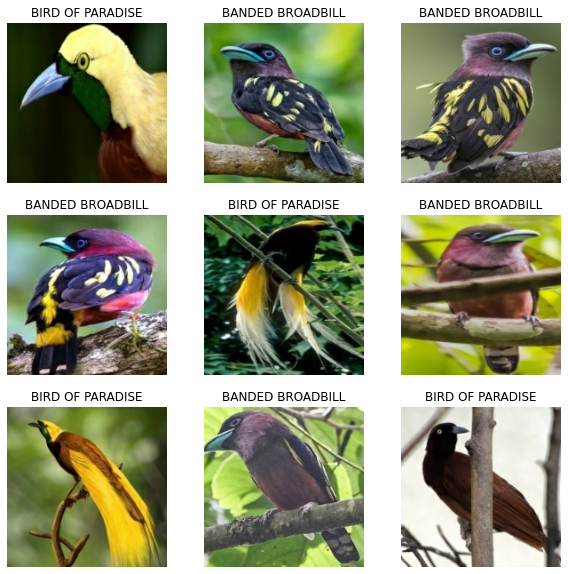

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in img_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
#  for image_batch, labels_batch in img_ds.as_numpy_iterator():
#   print(image_batch)
#   print(labels_batch)
#   break

In [21]:
def dataset_to_numpy(ds):
    """
    Convert tensorflow dataset to numpy arrays
    """
    images = []
    labels = []

    # Iterate over a dataset
    for i, (image, label) in enumerate(tfds.as_numpy(ds)):
        images.append(image)
        labels.append(label)

    for i, img in enumerate(images):
        if i < 3:
            print(img.shape, labels[i])

    return images, labels
imgs, labels = dataset_to_numpy(img_ds)

(32, 180, 180, 3) [1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1]
(32, 180, 180, 3) [0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1]
(32, 180, 180, 3) [0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0]


In [22]:
#imgs_np = np.concatenate((imgs, labels.T), axis=1)

## TSNE visualization

In [23]:
X_copy = df.drop(['target'], axis=1)
y_copy = df['target']

In [24]:
embedded_X = TSNE(n_components=2, learning_rate=50)
tsne_features = embedded_X.fit_transform(X_copy)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [25]:
df['tsne-2d-one'] = tsne_features[:,0]
df['tsne-2d-two'] = tsne_features[:,1]

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

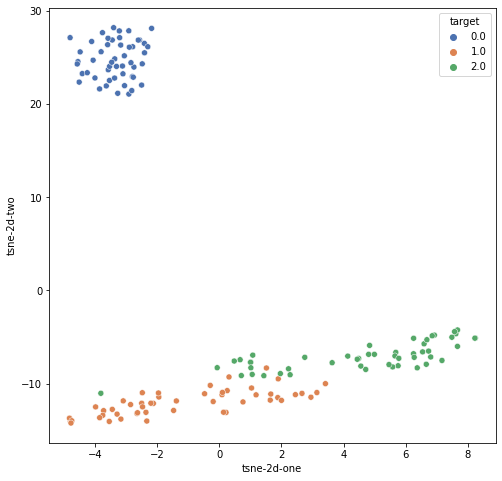

In [26]:
plt.figure(figsize=(8,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    data=df,
    legend="full",
    palette="deep"
)

In [27]:
reducer = UMAP(n_neighbors=100, n_components=3, n_epochs=1000, 
                min_dist=0.5, local_connectivity=2, random_state=42,
              )


In [28]:
X_reduced = reducer.fit_transform(X_copy, y_copy)

In [29]:
arr_concat=np.concatenate((X_reduced, y_copy.values.reshape(y.shape[0],1)), axis=1)
    # Create a Pandas dataframe using the above array
df_umap=pd.DataFrame(arr_concat, columns=['x', 'y', 'z', 'label'])
    # Convert label data type from float to integer

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


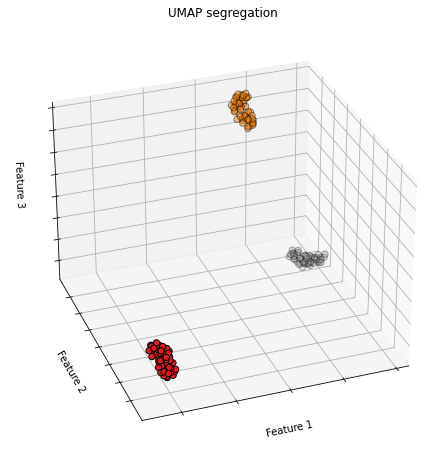

In [30]:
fig = plt.figure(1, figsize=(8, 6))
ax1 = Axes3D(fig, elev=-150, azim=110)
ax1 = Axes3D(fig, elev=-150, azim=110)
ax1.scatter(
    arr_concat[:, 0],
    arr_concat[:, 1],
    arr_concat[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax1.set_title("UMAP segregation")
ax1.set_xlabel("Feature 1")
ax1.w_xaxis.set_ticklabels([])
ax1.set_ylabel("Feature 2")
ax1.w_yaxis.set_ticklabels([])
ax1.set_zlabel("Feature 3")
ax1.w_zaxis.set_ticklabels([])

plt.show()